# Project - Rocket Motion

In this project I am dealing with rocket motion. the goal of this project was to use our ODE functions, 
and specfically the RK4 function to model rocket motion. I used the realistic numbers of an average rocket and using rk4 would calculate through the modeling with derivatives. When I was finally able to model the basic motion of a rocket including the running out of gas, I wanted to add gravity as well as the dropping of the fuel tanks mass

In [15]:
import ode
import numpy as np
import matplotlib.pyplot as plt

Here I start with my Function that will be involved in calculating the necessary variables to determine the position, velocity and mass of the rocket.

In [2]:
def Rocket(dep, t):
    
    x = dep[0]
    v = dep[1]
    m = dep[2]
    
    deriv = np.zeros(3)
    deriv[0] = v
    deriv[1] = thrust/m
    deriv[2] = dmdt
    
    return deriv

# The Base Test

In this following cell is where I declare my dependent variables as well as create my arrays and time step for the loop that will be the way in which i do the calculations for the base rocket. This Cell is the base test with no gravity or fuel tanks. Along with this in my For loop, I use our ODE, RK4 function for the more accurate calculations and i also check to make sure there is still fuel in the rocket itself; if there is not than it will stop thrusting and will maintain constant velocity in space. At the end of this cell I plot the velocity versus time graph of the base rocket.

<function matplotlib.pyplot.show(close=None, block=None)>

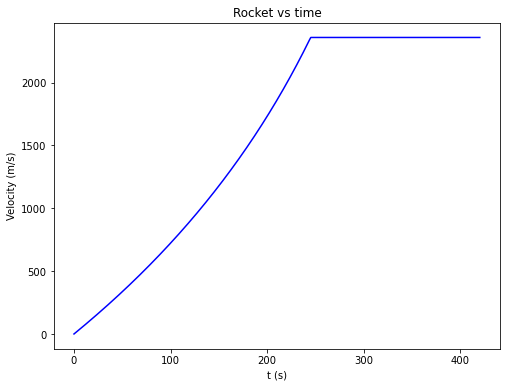

In [3]:
#Dependent Variables
x0 = 0     #We are starting at a blank origin in space, so 0
v0 = 0     #We are starting at rest
vex = 2575
m0 = 2041164  # this is the mass of the entire shuttle including the fuel and the 2 fuel tanks
mfuel0 = 0.6*m0
dmdt = -5000   # this is the rate at which the fuel is being burned
thrust = -dmdt*vex
data = np.array([x0,v0,m0])

#independent Variables
t = 0
h = 0.01
Nsteps = int(420/h)
    
#Creating the needed arrays 
tarr = np.zeros(Nsteps)
varr = np.zeros(Nsteps)
marr = np.zeros(Nsteps)
xarr = np.zeros(Nsteps)

tarr[0] = t
xarr[0] = x0
varr[0] = v0
marr[0] = m0

# compute
for n in range(1,Nsteps):
    
    data = ode.RK4(Rocket, data, t, h)
    
    t = t + h
    
    #An if loop to determine if we have run out of fuel based off of the mass of the shuttle
    if(data[2] < (m0 - mfuel0)):
        dmdt = 0
        thrust = 0
        
    # We store the values of the in the arrays
    tarr[n] = t
    xarr[n] = data[0]
    varr[n] = data[1]
    marr[n] = data[2]
    
# plotting the velocity vs time graph
plt.figure(figsize=(8,6))
plt.title("Rocket vs time")
plt.xlabel("t (s)")
plt.ylabel("Velocity (m/s)")
plt.plot(tarr, varr, "b-")
plt.show

In this Cell I graph the position versus time graph

<function matplotlib.pyplot.show(close=None, block=None)>

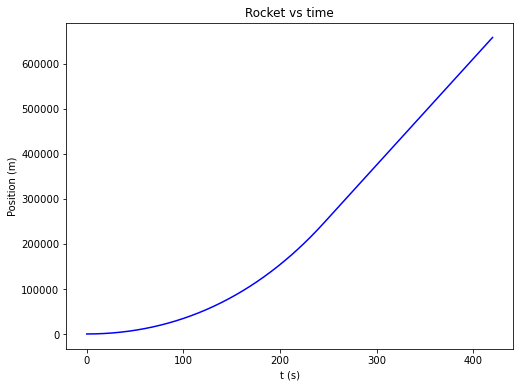

In [4]:
# plotting the position vs time graph
plt.figure(figsize=(8,6))
plt.title("Rocket vs time")
plt.xlabel("t (s)")
plt.ylabel("Position (m)")
plt.plot(tarr, xarr, "b-")
plt.show

In the cell I graph the mass versus time graph

<function matplotlib.pyplot.show(close=None, block=None)>

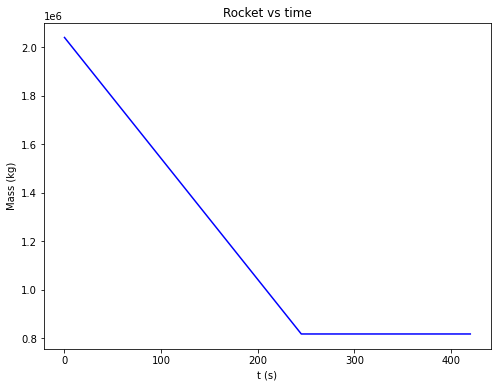

In [5]:
# plotting the Mass vs time graph
plt.figure(figsize=(8,6))
plt.title("Rocket vs time")
plt.xlabel("t (s)")
plt.ylabel("Mass (kg)")
plt.plot(tarr, marr, "b-")
plt.show

# Adding the Jettisons

In this following cell I have much of the same code as previous, however the major change in this one is that I added the fuel tanks onto the equation, so when we burn through the first fuel tanke we will drop the fuel tank itself and therefore drop the mass of it, and I do the same for the following second fuel tank

<function matplotlib.pyplot.show(close=None, block=None)>

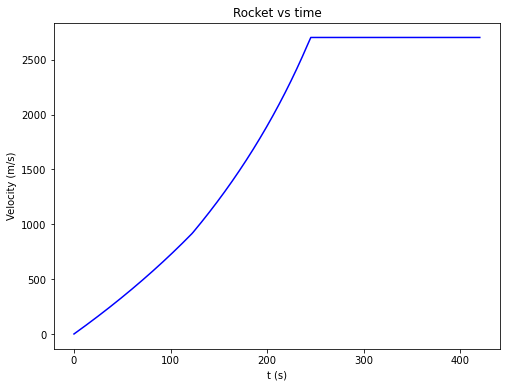

In [6]:
x0 = 0
v0 = 0 
vex = 2575
m0 = 2041164
mfuel0 = 0.6*m0
dmdt = -5000
thrust = -dmdt*vex
data = np.array([x0,v0,m0])
jettison = 'false'
jettison2 = 'false'

t = 0
h = 0.01
Nsteps = int(420/h)
    
#Creating arrays
tjarr = np.zeros(Nsteps)
vjarr = np.zeros(Nsteps)
mjarr = np.zeros(Nsteps)
xjarr = np.zeros(Nsteps)

tjarr[0] = t
xjarr[0] = x0
vjarr[0] = v0
mjarr[0] = m0

# compute
for n in range(1,Nsteps):
    
    data = ode.RK4(Rocket, data, t, h)
    
    t = t + h
    
    if(data[2] <= 0.7*m0 and jettison == 'false'):
        jettison = 'true'
        data[2] = data[2] - 0.1*m0
    if(data[2] <= 0.3*m0 and jettison2 == 'false'):
        jettison2 = 'true'
        data[2] = data[2] - 0.1*m0
        
    if(data[2] < (m0 - 0.7*m0)):
        dmdt = 0
        thrust = 0
    tjarr[n] = t
    xjarr[n] = data[0]
    vjarr[n] = data[1]
    mjarr[n] = data[2]
    
    
plt.figure(figsize=(8,6))
plt.title("Rocket vs time")
plt.xlabel("t (s)")
plt.ylabel("Velocity (m/s)")
plt.plot(tjarr, vjarr, "b-")
plt.show

In this cell I graph the position versus time graph

<function matplotlib.pyplot.show(close=None, block=None)>

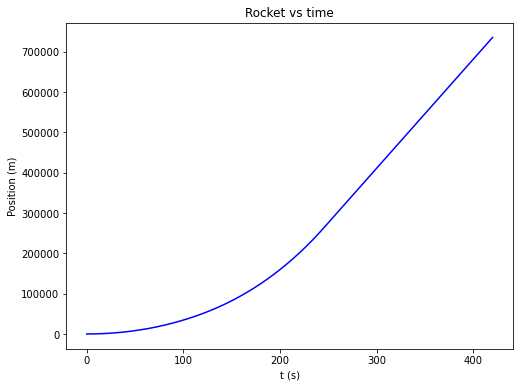

In [7]:
plt.figure(figsize=(8,6))
plt.title("Rocket vs time")
plt.xlabel("t (s)")
plt.ylabel("Position (m)")
plt.plot(tjarr, xjarr, "b-")
plt.show

In thie cell I graph the mass versus time graph, which we see has a major difference as there are moments in time where there is a sudden drop in the mass that represents the dropping of the first and second fuel tank

<function matplotlib.pyplot.show(close=None, block=None)>

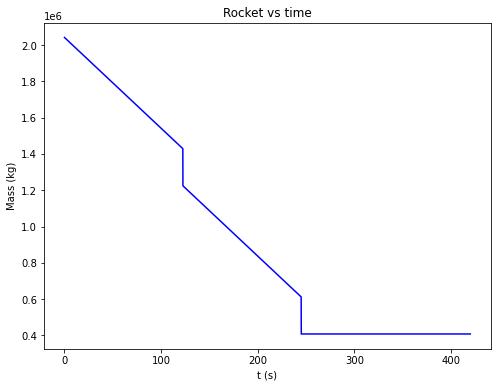

In [8]:
plt.figure(figsize=(8,6))
plt.title("Rocket vs time")
plt.xlabel("t (s)")
plt.ylabel("Mass (kg)")
plt.plot(tjarr, mjarr, "b-")
plt.show

# Adding Gravity

I will preface this by saying that this is an unfinshed product, in this following cell i attempted to add gravity into the equation, and therefore recreated a new function and most importanly a new equation to determine the velocity of the rocket.

In [16]:
G = 6.67408e-11
mEarth = 5.971e24
REarth = 6.4e6 #radius of E

def RocketG(dep, t):
    
    x = dep[0]
    v = dep[1]
    m = dep[2]
    
    deriv = np.zeros(4)
    deriv[0] = v
    deriv[1] = thrust/m - G*mEarth/(x+REarth)**2
    deriv[2] = dmdt
    return deriv

In this cell it is the same as previous even with the Fuel tanks however I have added an initial gravity and it should show different affects on the rocket as a whole

<function matplotlib.pyplot.show(close=None, block=None)>

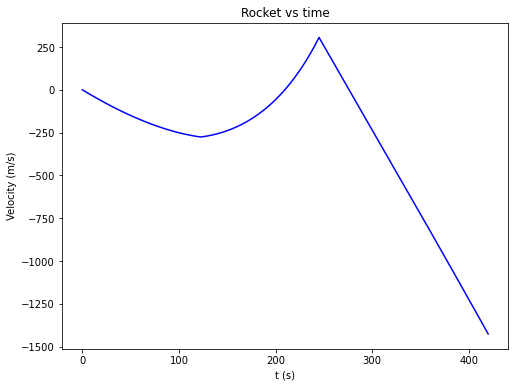

In [17]:
g0 = 0
x0 = 10
v0 = 0 
m0 = 2041164
vex = 2575
mfuel0 = 0.6*m0
dmdt = -5000
thrust = -dmdt*vex
data = np.array([x0,v0,m0,g0])
jettison = 'false'
jettison2 = 'false'

t = 0
h = 0.01
Nsteps = int(420/h)
    
#Creating arrays
tjarr = np.zeros(Nsteps)
vjarr = np.zeros(Nsteps)
mjarr = np.zeros(Nsteps)
xjarr = np.zeros(Nsteps)

tjarr[0] = t
xjarr[0] = x0
vjarr[0] = v0
mjarr[0] = m0

# compute
for n in range(1,Nsteps):
    
    data = ode.RK4(RocketG, data, t, h)
    
    t = t + h
    
    #Here instead of last time where we simply checked if we had run out of fuel, 
    #we instead constantly check the mass and when it reaches 70% we drop the first fuel tank
    #and when it reaches 30% we drop the mass of the second fuel tank,
    if(data[2] <= 0.7*m0 and jettison == 'false'):
        jettison = 'true'
        data[2] = data[2] - 0.1*m0
    if(data[2] <= 0.3*m0 and jettison2 == 'false'):
        jettison2 = 'true'
        data[2] = data[2] - 0.1*m0
        
    if(data[2] < (m0 - 0.7*m0)):
        dmdt = 0
        thrust = 0
    tjarr[n] = t
    xjarr[n] = data[0]
    vjarr[n] = data[1]
    mjarr[n] = data[2]
    
    
plt.figure(figsize=(8,6))
plt.title("Rocket vs time")
plt.xlabel("t (s)")
plt.ylabel("Velocity (m/s)")
plt.plot(tjarr, vjarr, "b-")
plt.show

In conclussion I learned a lot about modeling a rocket itself and was succesfully able to model a rocket that would drop its fuel tank, I also realized that it must take a lot of fuel to power the large rockets. Because as you can see above the rocket with the force of gravity drops straight into the ground.